# Chapter 1: The Machine Learning Landscape

In [1]:
import os

import pandas as pd
import numpy as np

# to make output stable across runs
np.random.seed(42)

# to plot pretty figures\
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings ( see SciPy issue #5998)
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

### Load and prepare Life satisfaction data

In [2]:
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
oecd_bli.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [3]:
oecd_bli['Life satisfaction'].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

### Load and prepare GDP per capita data

In [4]:
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',',
                             delimiter='\t', encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={'2015': "GDP per capita"}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [5]:
full_country_stats = pd.merge(oecd_bli, gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [6]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[remove_indices]
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


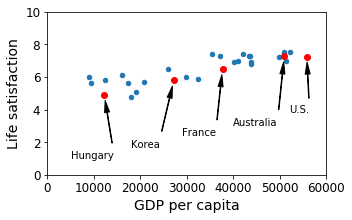

In [7]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                 figsize=(5,3))
# Set the axis properties, [xmin, xmax, ymin, ymax]
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.show()

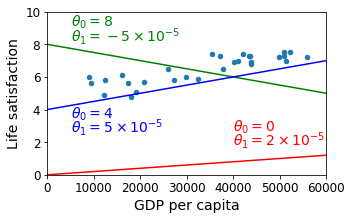

In [8]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction",
                 figsize=(5, 3))
# Set the axis properties, [xmin, xmax, ymin, ymax]
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, 2 * X / 100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8,
         r"$\theta_1 = 2 \times 10^{-5}$", fontdict={"fontsize": 14, "color": "r"})

plt.plot(X, 8 - 5 * X / 100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontdict={"fontsize": 14, "color": "g"})
plt.text(5000, 8.2,
         r"$\theta_1 = -5 \times 10^{-5}$", fontdict={"fontsize": 14, "color": "g"})

plt.plot(X, 4 + 5 * X / 100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontdict={"fontsize": 14, "color": "b"})
plt.text(5000, 2.6,
        r"$\theta_1 = 5 \times 10^{-5}$", fontdict={"fontsize": 14, "color": "b"})
plt.show()

In [9]:
# Find the model parameters
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
X_sample = np.c_[sample_data["GDP per capita"]]
y_sample = np.c_[sample_data["Life satisfaction"]]
lin_reg.fit(X_sample, y_sample)
t0, t1 = lin_reg.intercept_[0], lin_reg.coef_[0]
t0, t1

(4.853052800266436, array([4.91154459e-05]))

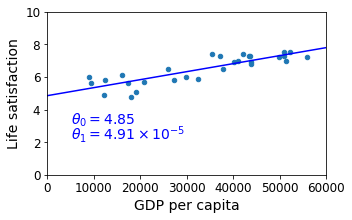

In [10]:
# Visualize the result
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction",
                 figsize=(5, 3))
# Set the axis properties, [xmin, xmax, ymin, ymax]
plt.axis([0, 60000, 0, 10])
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1 * X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontdict={"fontsize": 14, "color": "b"})
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$",
         fontdict={"fontsize": 14, "color": "b"})
plt.show()

In [11]:
# Make a predictionfor Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
lin_reg.predict(X_new)

array([[5.96242338]])

In [12]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)

22587.49


In [13]:
cyprus_predicted_life_satisfaction = lin_reg.predict(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction[0][0]

5.96244744318815

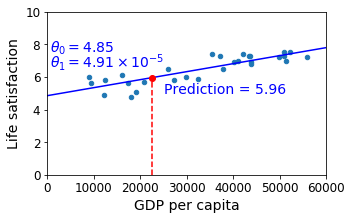

In [14]:
# Plot the result
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction",
                 figsize=(5, 3))
X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1 * X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(500, 7.5, r"$\theta_0 = 4.85$", fontdict={"fontsize": 14, "color": "b"})
plt.text(500, 6.6,
         r"$\theta_1 = 4.91 \times 10^{-5}$", fontdict={"fontsize": 14, "color": "b"})
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontdict={"fontsize": 14, "color": "b"})
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

In [15]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [16]:
position_text2  = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

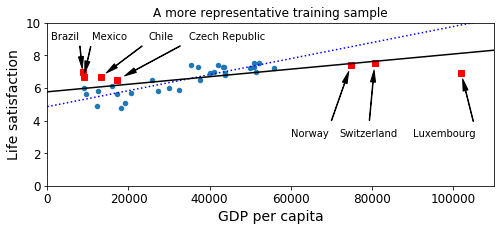

In [17]:
sample_data.plot(kind="scatter", x="GDP per capita", y="Life satisfaction",
                 figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
X_full = np.c_[full_country_stats["GDP per capita"]]
y_full = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(X_full, y_full)

t0_full, t1_full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0_full + t1_full * X, "k")
plt.title("A more representative training sample")
plt.show()

C:\Users\libin\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\libin\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


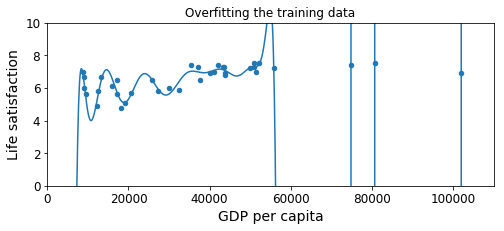

In [18]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction",
                        figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg_2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scaler', scaler), ('lin_reg', lin_reg_2)])
pipeline_reg.fit(X_full, y_full)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.title("Overfitting the training data")
plt.show()

In [19]:
# W-satisfaction rule
full_country_stats.loc[[c for c in full_country_stats.index if 'W' in c.upper()]]['Life satisfaction']

Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [20]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if 'W' in c.upper()]]

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
Papua New Guinea,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2084.713,2012.0
Rwanda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",731.512,2012.0
Swaziland,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3139.664,2014.0
Sweden,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",49866.266,2014.0


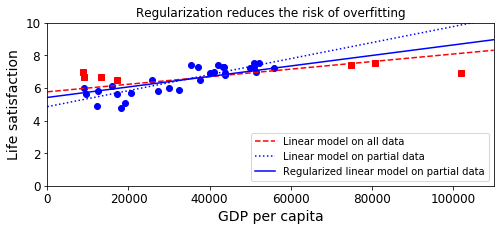

In [21]:
plt.figure(figsize=(8, 3))

plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

plt.plot(list(sample_data['GDP per capita']), list(sample_data['Life satisfaction']), 'bo')
plt.plot(list(missing_data['GDP per capita']), list(missing_data['Life satisfaction']), 'rs')

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0_full + t1_full * X, 'r--', label='Linear model on all data')
plt.plot(X, t0 + t1 * X, 'b:', label='Linear model on partial data')

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = np.c_[sample_data["GDP per capita"]]
y_sample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(X_sample, y_sample)
t0_ridge, t1_ridge = ridge.intercept_[0], ridge.coef_[0]

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0_ridge + t1_ridge * X, 'b', label='Regularized linear model on partial data')

plt.legend(loc='lower right')
plt.axis([0, 110000, 0, 10])
plt.title("Regularization reduces the risk of overfitting")
plt.show()